<a href="https://colab.research.google.com/github/tugcenurozkan/Change-Detection/blob/main/Change_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ruptures

     |████████████████████████████████| 918 kB 5.1 MB/s 


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tofaş Üzerinde Çalışılacak Veriler - 31agustos-13kasım .csv to Tofaş Üzerinde Çalışılacak Veriler - 31agustos-13kasım .csv


In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Tofaş Üzerinde Çalışılacak Veriler - 31agustos-13kasım .csv']))

In [4]:
df.head()

,ID,MID,Date,t(Meas.),t(Trans.),t(Calc.),T(Complete),IdentityNo 1,Q-Action,10920Z_Z (3),20920Z_Z (4),14100XYZ_X (3),14100XYZ_Y (3),14100XYZ_Z (3),14102XYZ_X (3),14102XYZ_Y (3),14102XYZ_Z (3),14003X_X (3),14002Z_Z (3),14005Y_Y (3),24100XYZ_X (4),24100XYZ_Y (4),24100XYZ_Z (4),24102XYZ_X (4),24102XYZ_Y (4),24102XYZ_Z (4),24003X_X (4),24002Z_Z (4),24005Y_Y (4)
0,1,1,13.11.2021,52,1,2,55,1,NaN,0.32,0.68,0.67,1.44,-0.09,0.35,1.86,-0.23,-0.59,-0.67,1.18,0.16,-0.22,-0.76,0.55,-0.56,-0.81,-0.19,-0.49,-0.3
1,2,523,13.11.2021,1,1,2,4,2,NaN,0.32,0.99,0.37,1.31,0.02,0.33,1.56,0.1,-0.65,-0.64,0.88,-0.01,-0.12,-0.45,-.--,-.--,-.--,-0.18,-0.29,-0.39
2,3,522,12.11.2021,52,1,2,55,3,NaN,0.44,0.93,0.51,1.43,0.12,0.42,1.88,0.12,-0.67,-0.5,1.15,-0.11,-0.12,-0.38,0.16,-0.64,-0.57,-0.25,-0.15,-0.37
3,4,521,12.11.2021,52,1,2,55,4,NaN,0.94,0.85,0.45,0.84,0.9,0.34,1.28,0.84,-0.41,0.17,0.52,0.13,-0.48,-0.41,-.--,-.--,-.--,-0.26,-0.11,-0.77
4,5,520,12.11.2021,52,1,2,55,5,NaN,0.36,0.84,0.76,1.02,-0.46,0.65,1.5,-0.5,-0.35,-0.94,1.03,0.28,-0.7,-0.58,0.57,-1.15,-0.78,-0.3,-0.32,-0.85


In [5]:
price_df=df[['Date','10920Z_Z (3)']]

In [6]:
price_df['Date']= pd.to_datetime(pd.Series(price_df['Date']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
price_df['10920Z_Z (3)'][0:30]  #gerek yok

0      0.32
1      0.32
2      0.44
3      0.94
4      0.36
5       0.4
6      0.92
7      0.26
8      0.88
9      0.86
10     0.92
11     0.28
12     0.79
13     0.41
14     0.57
15     1.02
16     0.58
17     0.87
18     0.67
19     0.66
20     0.32
21     1.07
22     0.87
23     0.84
24     0.79
25     0.22
26     0.39
27     0.79
28    -0.03
29     0.29
Name: 10920Z_Z (3), dtype: object

In [8]:
for i in range(0,len(price_df)-1):
  #print(i)
  if price_df['10920Z_Z (3)'][i]=='#.##':
    price_df['10920Z_Z (3)'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
price_df['10920Z_Z (3)']=price_df['10920Z_Z (3)'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7999 non-null   datetime64[ns]
 1   10920Z_Z (3)  7999 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 125.1 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


--------
<class 'ruptures.detection.pelt.Pelt'>
---------
[1525, 2060, 4145, 6620, 7999]


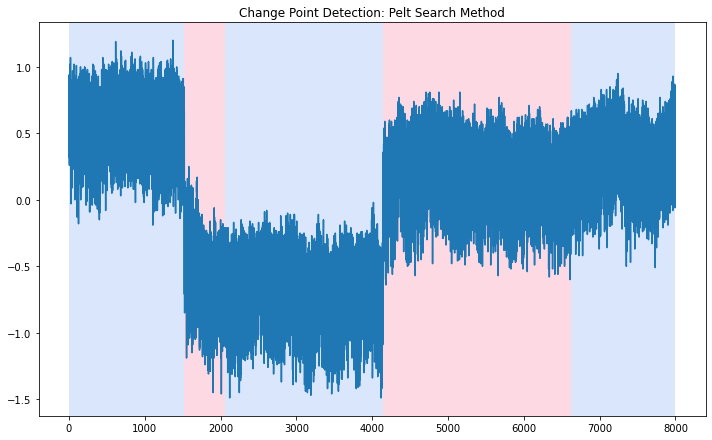

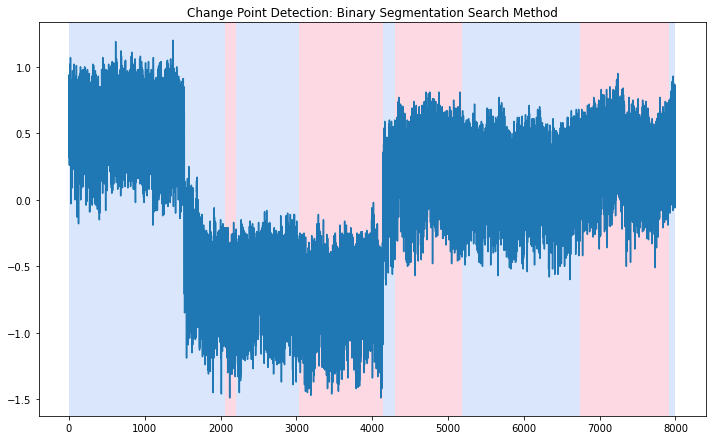

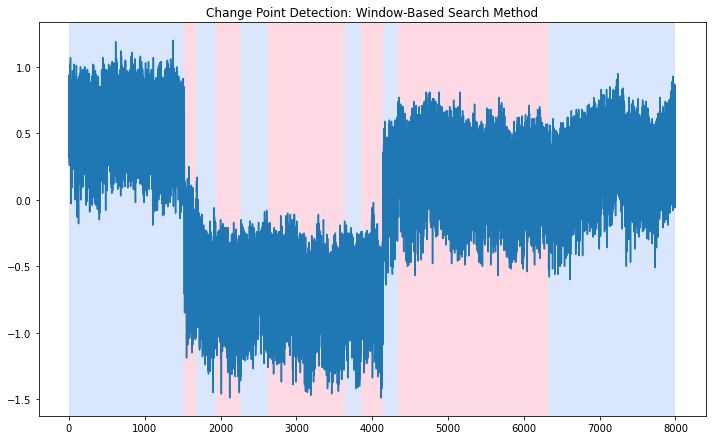

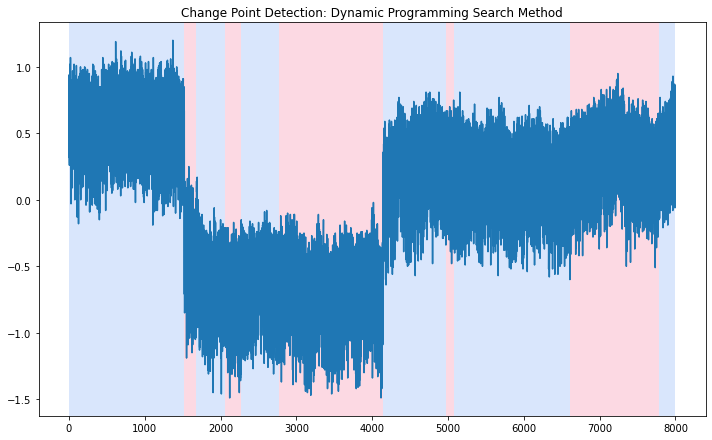

In [11]:
import numpy as np
import ruptures as rpt
from matplotlib import pyplot as plt
price_df.reset_index(level=0, inplace=True)
#Rename the columns for easier analysis
# price_df.rename(columns={'index':'Date',
#             price_df.columns[1]:'WTI_Price'}, 
#             inplace=True)
#Format the 'Date' column 
price_df['Date']=price_df['Date'].astype(str).str[:-3]
#Convert the Date column into a date object
price_df['Date']=pd.to_datetime(pd.Series(price_df['Date']))
#Subset to only include data going back to 2014
# price_df=price_df[(price_df['Date']>='2021-11-12')]

#Convert the time series values to a numpy 1D array
points=np.array(price_df['10920Z_Z (3)'])
#print(points)
#RUPTURES PACKAGE
# Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
print("--------")
print(algo)
print(type(algo))
print("---------")
result = algo.predict(pen=10.0)
print(result)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  
    
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()
    
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()